In [171]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%matplotlib inline

from pathlib import Path

In [411]:
from attila.util.config import get_env
from attila.util.plots import plot_history, plot_preds
from attila.util.io import load_pickle, append_rows2text, load_json, get_summary, dirs, stuff2pickle
from attila.experiments.tools import runs2tex

In [7]:
_here = Path('.').resolve()

In [9]:
config, data_path, out_path, models_config_path = get_env(_here)

In [182]:
config.set('training', 'batch size', '4')
config.set('training', 'epochs', '50')
config.set('data', 'aug', 'False')

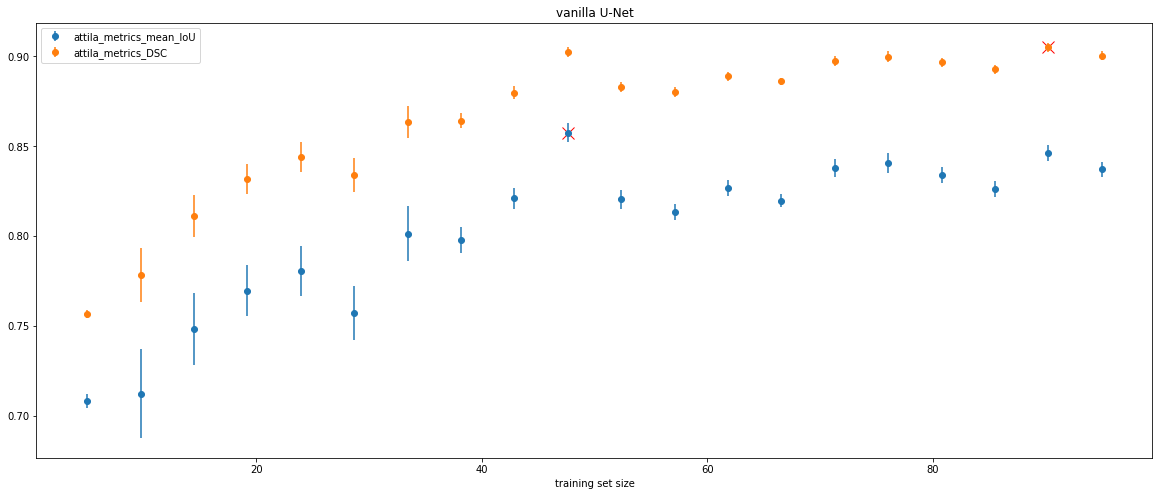

In [464]:
get_figa(1, 1)

metrics = [
    {
        'name': 'attila_metrics_mean_IoU',
        'callback': mean_IoU(get_batch_mean=False)
    },
    {
        'name': 'attila_metrics_DSC',
        'callback': DSC(get_batch_mean=False)
    }
]

results = {
    m: {
        'mean': [],
        'std': []
    }
    for m in [ x['name'] for x in metrics]
}
n_images = []

folders = dirs(out_path / 'trials' / 'to-aug-or-not')
no_aug_folders = filter(lambda f: f.name.startswith('no-aug'), folders)
aug_folders = filter(lambda f: f.name.startswith('aug'), folders)

for folder in no_aug_folders:
    valid_images = summary['n images']
    n_images.append((73 - valid_images) / 73 * 100)
    summary = get_summary(folder, config)

    y_true_batch = summary['preds'][1]
    y_pred_batch = summary['preds'][2]

    for m in metrics:
        key = m['name']
        f = m['callback']

        vals = f(
            normalize_transformation((0, 1))(y_true_batch),
            normalize_transformation((0, 1))(y_pred_batch)
        ).numpy()

        results[key]['mean'].append(vals.mean()  * (1 - 2 / (80 - valid_images)))
        results[key]['std'].append(vals.std())

for m in metrics:
    key = m['name']
    plt.errorbar(
        n_images,
        results[key]['mean'],
        yerr=results[key]['std'],
        fmt='o',
        label=key
    )
    plt.plot(n_images[np.argmax(results[key]['mean'])], np.max(results[key]['mean']), marker='x', color='r', markersize=12)

plt.xlabel('training set size')
plt.title('vanilla U-Net')
plt.legend()

stuff2pickle(results, 'results/no-aug.pkl')

In [432]:
np.linspace(0.05, 0.95, 20)

array([0.05      , 0.09736842, 0.14473684, 0.19210526, 0.23947368,
       0.28684211, 0.33421053, 0.38157895, 0.42894737, 0.47631579,
       0.52368421, 0.57105263, 0.61842105, 0.66578947, 0.71315789,
       0.76052632, 0.80789474, 0.85526316, 0.90263158, 0.95      ])

In [435]:
np.linspace(0.571, 0.95, 9)

array([0.571   , 0.618375, 0.66575 , 0.713125, 0.7605  , 0.807875,
       0.85525 , 0.902625, 0.95    ])

In [413]:
learning_rates

[1e-06,
 1.6238e-06,
 2.6367e-06,
 4.2813e-06,
 6.9519e-06,
 1.12884e-05,
 1.83298e-05,
 2.97635e-05,
 4.83293e-05,
 7.8476e-05,
 0.0001274275,
 0.0002069138,
 0.0003359818,
 0.0005455595,
 0.0008858668,
 0.00143845,
 0.0023357214,
 0.00379269,
 0.0061584823,
 0.01]